In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
z=pd.read_csv("/content/breast_cancer_survival.csv")
#print(z)
c = ["Date_of_Surgery", "Date_of_Last_Visit","Tumour_Stage","Histology","Surgery_type","Gender",]
x = z.drop(c, axis=1)
mapping = {"Alive": 1, "Dead": 0}
x["Patient_Status"] = x["Patient_Status"].map(mapping)
y = x["Patient_Status"]
x=x.drop("Patient_Status", axis=1)
mapp = {"Positive": 1, "Negative": 0}
x["ER status"]=x["ER status"].map(mapp)
mapp = {"Positive": 1, "Negative": 0}
x["PR status"]=x["PR status"].map(mapp)
mapp = {"Positive": 1, "Negative": 0}
x["HER2 status"]=x["HER2 status"].map(mapp)

<BarContainer object of 1 artists>

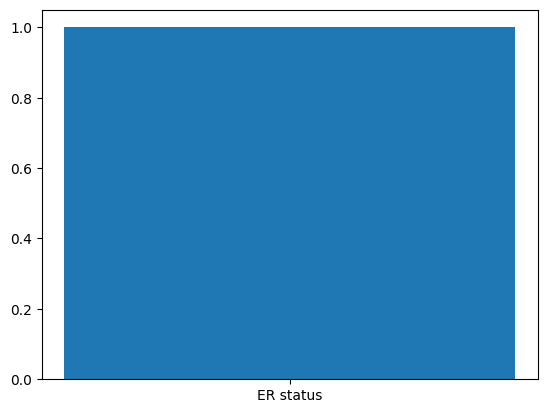

In [2]:
a=["ER status"]
plt.bar(a,1)

<BarContainer object of 1 artists>

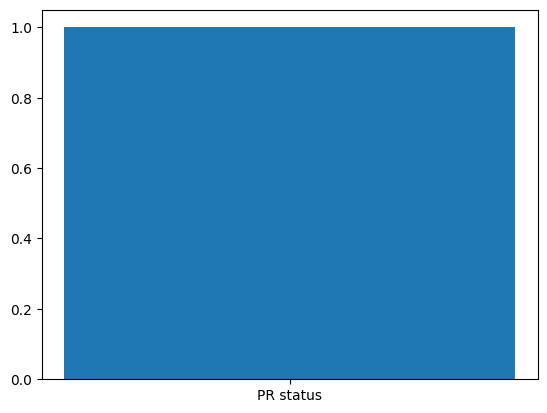

In [3]:
plt.bar("PR status",1)

In [4]:
x=x.drop("ER status",axis=1)
x=x.drop("PR status",axis=1)
print(x)
print(y)

     Age  Protein1  Protein2  Protein3  Protein4  HER2 status
0     42  0.952560   2.15000  0.007972 -0.048340            0
1     54  0.000000   1.38020 -0.498030 -0.507320            0
2     63 -0.523030   1.76400 -0.370190  0.010815            0
3     78 -0.876180   0.12943 -0.370380  0.132190            0
4     42  0.226110   1.74910 -0.543970 -0.390210            1
..   ...       ...       ...       ...       ...          ...
329   59  0.024598   1.40050  0.024751  0.280320            1
330   41  0.100120  -0.46547  0.472370 -0.523870            1
331   54  0.753820   1.64250 -0.332850  0.857860            0
332   74  0.972510   1.42680 -0.366570 -0.107820            0
333   66  0.286380   1.39980  0.318830  0.836050            0

[334 rows x 6 columns]
0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
329    1.0
330    1.0
331    0.0
332    1.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64


In [5]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
x_bias = np.c_[np.ones((x.shape[0], 1)), x]
num_iterations = 1000
learning_rate = 0.01
num_samples, num_features = x_bias.shape
weights = np.zeros(num_features)
for _ in range(num_iterations):
    linear_model = np.dot(x_bias, weights)
    predictions = sigmoid(linear_model)
    gradient = np.dot(x_bias.T, (predictions - y)) / num_samples
    weights -= learning_rate * gradient
final_predictions = sigmoid(np.dot(x_bias, weights))
final_predictions = (final_predictions > 0.5).astype(int)
accuracy = np.mean(final_predictions == y)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.20


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def logistic_regression(data):
    data['Patient_Status'] = data['Patient_Status'].map({'Alive': 1, 'Dead': 0})
    data['HER2 status'] = data['HER2 status'].map({'Positive': 1, 'Negative': 0})
    data = data.fillna(data.mean())
    columns_to_drop = ['Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', 'Tumour_Stage', 'Gender','ER status','PR status']
    data = data.drop(columns=columns_to_drop)
    if data['Patient_Status'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
    features = data.drop("Patient_Status", axis=1)
    target = data["Patient_Status"].astype(int)
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
data = pd.read_csv("/content/breast_cancer_survival.csv")
logistic_regression(data)

Accuracy: 0.7761194029850746


<ipython-input-6-b7d6982706d3>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
